In [45]:
import matplotlib
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import collections as col
from IPython.display import IFrame
from geopy import distance
import statistics
import math
# import geopy
# from geopy import distance
from geolib import geohash as gh
import json

nodes = pd.read_csv('network_nodes.csv', sep='\t')
edges = pd.read_csv('edges.csv', sep='\t')
# Create network

G_ml = nx.Graph()
for index, row in nodes.iterrows():
    G_ml.add_node(row['id'],stars=row['stars'],success=row['success'],geohash=row['geohash']) 

for idx, row in edges.iterrows():
    G_ml.add_edge(row['Source'], row['Target'], weight=row['distance'], edgetype=row['t'])
    


In [26]:
nodes = pd.read_csv('network_nodes.csv', sep='\t')
edges = pd.read_csv('edges_encoded', sep='\t')

In [16]:
set_of_nodes = set(nodes_cpy['id'])
edges_enc = edges.copy()
for idx, row in edges_enc.iterrows():
    print(np.round(idx/(edges_enc.shape[0])*100,1), end="\r", flush=True)
    if row['Source'] > nodes_cpy.shape[0] or row['Target'] > nodes_cpy.shape[0]:
        edges_enc.drop(idx, inplace=True)
        print("Dropped 1")
#     if row['Source'] in set_of_nodes and row['Target'] in set_of_nodes:
#         edges_cpy2.at[idx, 'Source'] = nodes.index[nodes.index[nodes['id'] == row["Source"]]][0]
#         edges_cpy2.at[idx, 'Target'] = nodes.index[nodes.index[nodes['id'] == row["Target"]]][0]
#     else:
#         edges_cpy.drop(idx, inplace=True)
print(edges_enc.shape)

# src = edges_cpy['Source'].to_numpy()
# dst = edges_cpy['Target'].to_numpy()
# # # Create a DGL graph from a pair of numpy arrays
# g = dgl.graph((src, dst))
# print(g)


KeyError: 'source'

In [27]:
# edges_cpy.shape
# node_attrs = pd.DataFrame()
# import tensorflow as tf
import dgl
src = np.asarray(edges['Source'].to_numpy()).astype(int)
dst = np.asarray(edges['Target'].to_numpy()).astype(int)
# # # Create a DGL graph from a pair of numpy arrays
# # src_tensor = tf.convert_to_tensor(src)
g = dgl.graph((src, dst))
print(g)
# Load node features


Graph(num_nodes=4205, num_edges=815888,
      ndata_schemes={}
      edata_schemes={})


In [46]:
from collections import Counter
from  itertools import chain

cats_file = open("cats_list.txt.csv")
file_contents = cats_file.read()
contents_split = file_contents.splitlines()
contents_split = [s.replace("'", "") for s in contents_split]
cats_list = [x.strip(' ') for x in contents_split]

nodes_cpy = nodes.copy()
for idx, row in nodes_cpy.iterrows():
    val=set(row['categories'].split(', ')).intersection(cats_list)
    nodes_cpy.at[idx,'categories'] = val
    
# Remove restaurants with no categories, and remove "restaurants" category
for idx, row in nodes_cpy.iterrows():
    if len(row['categories']) == 0:
        nodes_cpy.drop(idx, inplace=True)
    else:
        if 'Restaurants' in row['categories']:
            if len(row['categories']) > 1:
                row['categories'].remove('Restaurants')
            else:
                nodes_cpy.drop(idx, inplace=True)
        if 'Fast Food' in row['categories'] and len(row['categories']) > 1:
            row['categories'].remove('Fast Food')

from collections import Counter
from  itertools import chain

df = pd.Series(Counter(chain(*nodes_cpy.categories))).sort_index().rename_axis('categories').reset_index(name='f')
pd.set_option("display.max_rows", None)
num_in_cat = dict(zip(df.categories, df.f))

for idx, row in nodes_cpy.iterrows():
    if len(row['categories']) > 1:
        for e in row['categories']:
            max_num = 0
            max_elem = ""
            if num_in_cat[e] > max_num:
                max_num = num_in_cat[e]
                max_elem = e
        nodes_cpy.at[idx,'filtered_cat'] = max_elem
#     elif len(row['categories']) != 0:
    else:
        nodes_cpy.at[idx,'filtered_cat'] = list(row['categories'])[0]
#         for e in list(row['categories']):
#             if e != max_elem:
#                 row['categories'].remove(e)
nodes_cpy.shape

(3389, 17)

In [47]:
set_of_nodes = set(nodes_cpy['id'])
remove = set(G_ml.nodes) - set_of_nodes
G_ml.remove_nodes_from(remove)

In [63]:
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn.functional as F
lb_make = LabelEncoder()
# Load and encode node features

nodes_enc = pd.DataFrame()
nodes_enc['id'] = nodes_cpy['id']
nodes_enc['id_enc'] = lb_make.fit_transform(nodes_cpy['id'])
nodes_enc['geohash'] = lb_make.fit_transform(nodes_cpy['geohash'])
nodes_enc['category'] = lb_make.fit_transform(nodes_cpy['filtered_cat'])
# print(edges_remove.shape, nodes_enc.shape)
id_codes = dict(zip(nodes_enc.id, nodes_enc.id_enc))

edges_remove = nx.to_pandas_edgelist(G_ml)
# src_set = set(edges_remove.source)
# src_len = len(src_set)
# targ_set = set(edges_remove.target)
# targ_len = len(targ_set)

for idx, row in edges_remove.iterrows():
    print(np.round(idx/(edges_remove.shape[0])*100,1), end="\r", flush=True)
    edges_remove.at[idx, 'source'] = id_codes[row['source']]
    edges_remove.at[idx, 'target'] = id_codes[row['target']]
edges_remove.head()
# import dgl
# src = np.asarray(edges_remove['Source'].to_numpy()).astype(int)
# dst = np.asarray(edges_remove['Target'].to_numpy()).astype(int)
# # # # Create a DGL graph from a pair of numpy arrays
# # # src_tensor = tf.convert_to_tensor(src)
# g = dgl.graph((src, dst))
# print(g)

KeyboardInterrupt: 

In [369]:
# er = pd.read_csv('edges_remove_11_20', sep='\t')
# er = er.drop(labels='Unnamed: 0', axis=1)
er.head()
# er.to_csv('edge_list_11_21',sep='\t',index=False)
# nodes_enc.to_csv('nodes_11_21', sep='\t',index=False)
nodes_cpy.to_csv('nodes_cpy',sep='\t')

In [367]:
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn.functional as F
lb_make = LabelEncoder()
# Load and encode node features

src = np.asarray(er['source'].to_numpy()).astype(int)
dst = np.asarray(er['target'].to_numpy()).astype(int)

# # # Create a DGL graph from a pair of numpy arrays
# # src_tensor = tf.convert_to_tensor(src)
g = dgl.graph((src, dst))

# edges_enc = pd.DataFrame()
nodes_enc = pd.DataFrame()
nodes_enc['id'] = nodes_cpy['id']
nodes_enc['id_enc'] = lb_make.fit_transform(nodes_cpy['id'])
nodes_enc['geohash'] = lb_make.fit_transform(nodes_cpy['geohash'])
nodes_enc['category'] = lb_make.fit_transform(nodes_cpy['filtered_cat'])
nodes_enc['stars'] = lb_make.fit_transform(nodes_cpy['stars'])
nodes_enc['lat'] = nodes_cpy['latitude']
nodes_enc['lon'] = nodes_cpy['longitude']


# edges_enc['type'] = lb_make.fit_transform(edges['t'])
geohash = torch.tensor(nodes_enc['geohash'].to_numpy()).long()
category = torch.tensor(nodes_enc['category'].to_numpy()).long()
lat = torch.tensor(nodes_cpy['latitude'].to_numpy()).long()
lon =  torch.tensor(nodes_cpy['longitude'].to_numpy()).long()
stars =  torch.tensor(nodes_cpy['stars'].to_numpy()).long()
tensor_list =[geohash,lat,lon,category]
stacked_tensor = torch.stack(tensor_list,dim=1)
g.ndata['feat'] = stacked_tensor
g.ndata['label'] = stars
# print(stacked_tensor)
# Add node attributes to graph
# g.ndata['geohash'] = geohash
# g.ndata['category'] = category
# g.ndata['stars'] = stars
# g.ndata['lat'] = lat
# g.ndata['lon'] = lon

edges_enc = pd.DataFrame()
edges_enc['type'] = lb_make.fit_transform(er['edgetype'])
edges_enc['weight'] = er['weight']
edgetype = torch.tensor(edges_enc['type'].to_numpy()).long()
distance = torch.tensor(er['weight'].to_numpy()).long()

# Add edge attributes
g.edata['edgetype'] = edgetype
g.edata['distance'] = distance
g = dgl.add_self_loop(g)
# g = dgl.to_bidirected(g,True)

print(g)
# tensor_list
# nodes_enc.to_csv('nodes_encoded_11_21', sep='\t',index=False)
# edges_enc['source'] = er['source']
# edges_enc['target'] = er['target']
# edges_enc.to_csv('edge_enc_11_21',sep='\t',index=False)


Graph(num_nodes=3389, num_edges=806248,
      ndata_schemes={'feat': Scheme(shape=(4,), dtype=torch.int64), 'label': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'edgetype': Scheme(shape=(), dtype=torch.int64), 'distance': Scheme(shape=(), dtype=torch.int64)})


In [298]:
print(g.num_nodes())
print(g.num_edges())
# Out degrees of the center node
print(g.out_degrees(0))
# In degrees of the center node - note that the graph is directed so the in degree should be 0.
print(g.in_degrees(0))

print('Node features')
print(g.ndata)
print('Edge features')
print(g.edata)

3389
1609107
174
174
Node features
{'feat': tensor([[243,  30, -97,  58],
        [408,  30, -97,  13],
        [ 52,  30, -97,  58],
        ...,
        [393,  30, -97,  19],
        [100,  30, -97,  19],
        [211,  30, -97,  50]]), 'label': tensor([4, 2, 1,  ..., 3, 3, 3])}
Edge features
{}


In [156]:
nodes_enc.head()

,id,id_enc,geohash,category,stars,lat,lon
0,NRPemqVb4qpWFF0Avq_6OQ,1300,243,58,7,30.234533,-97.877262
1,bRsDZ44CD3uhGnRY3NeQhQ,2138,408,13,2,30.441875,-97.746581
2,CtKjULH4WuxgB-mtFgBuBw,742,52,58,0,30.087588,-97.822439
3,Pk4ZwXwUU50BDn5gqw_rKg,1437,99,42,4,30.162081,-97.789132
4,m_a0-8_wR1ypvZzDGeSIgA,2726,9,17,3,30.013465,-97.863625


In [364]:
def process_graph(graph):
    # If your dataset is a node classification dataset, you will need to assign
    # masks indicating whether a node belongs to training, validation, and test set.
    n_nodes = graph.num_nodes()
    n_train = int(n_nodes * 0.8)
    n_val = int(n_nodes * 0.1)
    train_mask = torch.zeros(n_nodes, dtype=torch.bool)
    val_mask = torch.zeros(n_nodes, dtype=torch.bool)
    test_mask = torch.zeros(n_nodes, dtype=torch.bool)
    pop = [*range(n_nodes)]
    train_idx = random.sample(pop,n_train)
    for train_i in train_idx:
        pop.remove(train_i)
    val_idx = random.sample(pop,n_val)
    for val_i in val_idx:
        pop.remove(val_i)
    test_idx = pop
    # train_mask[:n_train] = True
    # val_mask[n_train:n_train + n_val] = True
    # test_mask[n_train + n_val:] = True
    train_mask[train_idx] = True
    val_mask[val_idx] = True
    test_mask[test_idx] = True
    graph.ndata['train_mask'] = train_mask
    graph.ndata['val_mask'] = val_mask
    graph.ndata['test_mask'] = test_mask
    return graph

from dgl.nn import GraphConv

# class GCN(nn.Module):
#     def __init__(self, in_feats, h_feats, num_classes):
#         super(GCN, self).__init__()
#         self.conv1 = GraphConv(in_feats, h_feats)
#         self.conv2 = GraphConv(h_feats, num_classes)

#     def forward(self, g, in_feat):
#         h = self.conv1(g, in_feat)
#         h = F.relu(h)
#         h = self.conv2(g, h)
#         return h  
class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCN, self).__init__()
        self.conv1 = dglnn.GraphConv(in_feats, h_feats)
        self.conv2 = dglnn.GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h

class GATConv(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GATConv, self).__init__()
        self.conv1 = dglnn.GATConv(n_feats=in_feats, out_feats=h_feats, num_heads=2)
        self.conv2 = dglnn.GATConv(in_feats=h_feats,  out_feats=num_classes, num_heads=2)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h    

# Contruct a two-layer GNN model
import dgl.nn as dglnn
import torch.nn as nn
import torch.nn.functional as F

class SAGE(nn.Module):
    def __init__(self, in_feats, h_feats, out_feats):
        super().__init__()
        self.conv1 = dglnn.SAGEConv(
            in_feats=in_feats, out_feats=h_feats, aggregator_type='mean')
        self.conv2 = dglnn.SAGEConv(
            in_feats=h_feats, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
        return h
    
def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)
    
def train(g, model):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    best_val_acc = 0
    best_test_acc = 0

    features = g.ndata['feat']
    labels = g.ndata['label']
    train_mask = g.ndata['train_mask']
    val_mask = g.ndata['val_mask']
    test_mask = g.ndata['test_mask']
    for e in range(100):
        # Forward
        logits = model(g, features)

        # Compute prediction
        pred = logits.argmax(1)

        # Compute loss
        # Note that you should only compute the losses of the nodes in the training set.
        loss = F.cross_entropy(logits[train_mask], labels[train_mask])

        # Compute accuracy on training/validation/test
        train_acc = (pred[train_mask] == labels[train_mask]).float().mean()
        val_acc = (pred[val_mask] == labels[val_mask]).float().mean()
        test_acc = (pred[test_mask] == labels[test_mask]).float().mean()

        # Save the best validation accuracy and the corresponding test accuracy.
        if best_val_acc < val_acc:
            best_val_acc = val_acc
            best_test_acc = test_acc

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if e % 5 == 0:
            print('In epoch {}, loss: {:.3f}, val acc: {:.3f} (best {:.3f}), test acc: {:.3f} (best {:.3f})'.format(
                e, loss, val_acc, best_val_acc, test_acc, best_test_acc))
    
graph = process_graph(g)
print(graph)

node_features = graph.ndata['feat']
node_labels = graph.ndata['label']
train_mask = graph.ndata['train_mask']
valid_mask = graph.ndata['val_mask']
test_mask = graph.ndata['test_mask']
# n_features = node_features.shape[1]
graph.ndata['label'] = graph.ndata['label'].type(torch.LongTensor)

model = GCN(graph.ndata['feat'].shape[1], 16, len(set(nodes_enc['stars'])))
train(graph, model)

# print(g)

# n_labels = int(node_labels.max().item() + 1)
nodes_enc

Graph(num_nodes=3389, num_edges=806248,
      ndata_schemes={'feat': Scheme(shape=(4,), dtype=torch.int64), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={'edgetype': Scheme(shape=(), dtype=torch.int64), 'distance': Scheme(shape=(), dtype=torch.int64)})
In epoch 0, loss: 61.571, val acc: 0.056 (best 0.056), test acc: 0.068 (best 0.068)


C:\Users\dhire\anaconda3\envs\CN\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In epoch 5, loss: 8.868, val acc: 0.527 (best 0.527), test acc: 0.479 (best 0.479)
In epoch 10, loss: 5.401, val acc: 0.302 (best 0.527), test acc: 0.312 (best 0.479)
In epoch 15, loss: 6.847, val acc: 0.322 (best 0.527), test acc: 0.356 (best 0.479)
In epoch 20, loss: 6.379, val acc: 0.104 (best 0.527), test acc: 0.147 (best 0.479)
In epoch 25, loss: 4.526, val acc: 0.352 (best 0.527), test acc: 0.365 (best 0.479)
In epoch 30, loss: 4.230, val acc: 0.367 (best 0.527), test acc: 0.371 (best 0.479)
In epoch 35, loss: 3.717, val acc: 0.399 (best 0.527), test acc: 0.391 (best 0.479)
In epoch 40, loss: 3.232, val acc: 0.456 (best 0.527), test acc: 0.426 (best 0.479)
In epoch 45, loss: 2.709, val acc: 0.453 (best 0.527), test acc: 0.432 (best 0.479)
In epoch 50, loss: 2.221, val acc: 0.435 (best 0.527), test acc: 0.412 (best 0.479)
In epoch 55, loss: 1.686, val acc: 0.426 (best 0.527), test acc: 0.391 (best 0.479)
In epoch 60, loss: 1.717, val acc: 0.296 (best 0.527), test acc: 0.265 (best 

,id,id_enc,geohash,category,stars,lat,lon
0,NRPemqVb4qpWFF0Avq_6OQ,1300,243,58,7,30.234533,-97.877262
1,bRsDZ44CD3uhGnRY3NeQhQ,2138,408,13,2,30.441875,-97.746581
2,CtKjULH4WuxgB-mtFgBuBw,742,52,58,0,30.087588,-97.822439
3,Pk4ZwXwUU50BDn5gqw_rKg,1437,99,42,4,30.162081,-97.789132
4,m_a0-8_wR1ypvZzDGeSIgA,2726,9,17,3,30.013465,-97.863625
5,Ieelu69Y23nbjKG3OGfwnw,1039,94,19,1,30.232133,-97.823183
6,IFB2K3BEZ2L_Mv5AbUD26Q,1019,297,50,5,30.266996,-97.745362
7,fBvQQUk1-V9IUA8PbuYFWg,2314,299,2,5,30.266639,-97.743659
8,LjQ_z_eYTvbPkdnxD_Ucrw,1195,515,41,6,30.372930,-97.724076
9,UbP_JuB-zHHfLz2dvKe9yw,1697,141,50,6,30.192597,-97.738678


In [325]:
node_features = graph.ndata['feat']
node_labels = graph.ndata['label']
train_mask = graph.ndata['train_mask']
valid_mask = graph.ndata['val_mask']
test_mask = graph.ndata['test_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)
# print(n_labels)
model = SAGE(in_feats=n_features, h_feats=100, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
train(g, model)
# for epoch in range(10):
#     model.train()
#     # forward propagation by using all nodes
#     logits = model(graph, node_features)
#     # compute loss
#     loss = F.cross_entropy(logits[train_mask], node_labels[train_mask])
#     # compute validation accuracy
#     acc = evaluate(model, graph, node_features, node_labels, valid_mask)
#     # backward propagation
#     opt.zero_grad()
#     loss.backward()
#     opt.step()
#     print(loss.item())

    # Save model if necessary.  Omitted in this example.

    # Save model if necessary.  Omitted in this example.

6


DGLError: [22:44:15] C:\Users\Administrator\dgl-0.5\src\array\kernel.cc:52: Check failed: (out->dtype).code == kDLFloat (

In [175]:
G_nx = nx.Graph()
for index, row in nodes_enc.iterrows():
    G_nx.add_node(row['id_enc'],stars=row['stars'],category=row['category'],geohash=row['geohash'], lat=row['lat'], lon=row['lon']) 

for idx, row in er.iterrows():
    G_nx.add_edge(row['source'], row['target'], distance=row['weight'], edgetype=row['edgetype'])
# nodes_enc.head()
# G_nx.number_of_nodes()

for node_id, node_data in G_nx.nodes(data=True):
    node_data["feature"] = [node_data["category"], node_data["geohash"], node_data['lat'], node_data['lon']]
 
edges_new = nx.to_pandas_edgelist(G_ml)

G_new = nx.Graph()
for index, row in nodes_enc.iterrows():
    G_new.add_node(row['id'],stars=row['stars'],category=row['category'],geohash=row['geohash'], lat=row['lat'], lon=row['lon']) 

for idx, row in edges_new.iterrows():
    G_new.add_edge(row['source'], row['target'], distance=row['weight'], edgetype=row['edgetype'])
# nodes_enc.head()
# G_nx.number_of_nodes()

for node_id, node_data in G_new.nodes(data=True):
    node_data["feature"] = [node_data["category"], node_data["geohash"], node_data['lat'], node_data['lon']]
G_new.number_of_nodes()


3389

StellarGraph: Undirected multigraph
 Nodes: 3389, Edges: 802859

 Node types:
  default: [3389]
    Features: float32 vector, length 4
    Edge types: default-cat->default, default-near->default

 Edge types:
    default-cat->default: [773670]
        Weights: all 1 (default)
        Features: none
    default-near->default: [29189]
        Weights: all 1 (default)
        Features: none
Using GCN (local pooling) filters...


C:\Users\dhire\anaconda3\envs\CN\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
1/1 - 3s - loss: 3.0253 - auc_26: 0.5425 - binary_accuracy: 0.8215 - acc: 0.1961 - val_loss: 2.9787 - val_auc_26: 0.5411 - val_binary_accuracy: 0.8210 - val_acc: 0.1947
Epoch 2/20
1/1 - 0s - loss: 2.8255 - auc_26: 0.5405 - binary_accuracy: 0.8215 - acc: 0.1964 - val_loss: 2.8293 - val_auc_26: 0.5407 - val_binary_accuracy: 0.8210 - val_acc: 0.1947
Epoch 3/20
1/1 - 0s - loss: 2.7441 - auc_26: 0.5440 - binary_accuracy: 0.8221 - acc: 0.1980 - val_loss: 2.6804 - val_auc_26: 0.5445 - val_binary_accuracy: 0.8210 - val_acc: 0.1947
Epoch 4/20
1/1 - 0s - loss: 2.6055 - auc_26: 0.5506 - binary_accuracy: 0.8220 - acc: 0.1977 - val_loss: 2.5299 - val_auc_26: 0.5508 - val_binary_accuracy: 0.8210 - val_acc: 0.1947
Epoch 5/20
1/1 - 0s - loss: 2.4436 - auc_26: 0.5485 - binary_accuracy: 0.8222 - acc: 0.1987 - val_loss: 2.3794 - val_auc_26: 0.5533 - val_binary_accuracy: 0.8210 - val_acc: 0.1947
Epoch 6/20
1/1 - 0s - loss: 2.2380 - auc_26: 0.5477 - binary_accuracy: 0.8218 - acc: 0.1977 - val_lo

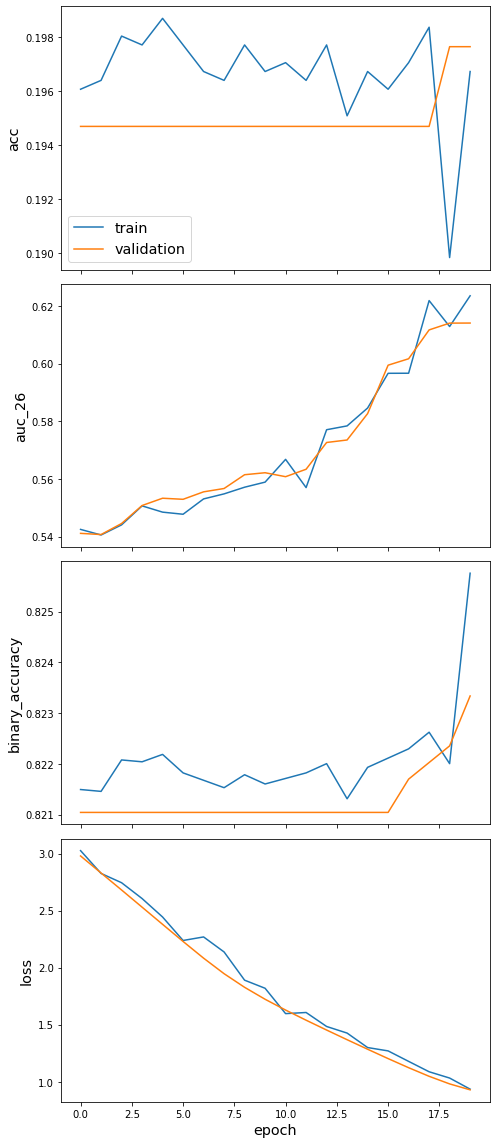

In [354]:
from collections import Counter
import networkx as nx
import pandas as pd
import os
from stellargraph import StellarGraph

import stellargraph as sg
from stellargraph.mapper import GraphSAGENodeGenerator
from stellargraph.layer import GraphSAGE
from stellargraph.layer import GCN

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, feature_extraction, model_selection
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# features = nodes_enc[['category', 'geohash', 'lat','lon','stars']].copy()

stellar_g  = StellarGraph.from_networkx(G_nx, node_features='feature', edge_type_attr='edgetype')
#                                         node_type_attr='stars',edge_type_attr='edgetype')
                                        #node_features='category')#,'geohash','lat','lon'])
# stellar_g = StellarGraph.from_networkx(G_nx, edge_type_attr='edgetype',
#                                        node_features=features)
print(stellar_g.info())

classes = pd.DataFrame.from_dict(dict(G_nx.nodes(data=True)), orient='index')
# classes.shape

stars = classes[['stars']].copy()
batch_size=50
train_subjects, test_subjects = model_selection.train_test_split(
    stars, train_size=0.9, test_size=None)#, stratify=classes['stars'].apply(str)
# )

target_encoding = preprocessing.LabelBinarizer()

train_targets = target_encoding.fit_transform(train_subjects)
test_targets = target_encoding.transform(test_subjects)

# generator = GraphSAGENodeGenerator(stellar_g, batch_size, [20,10])
generator = FullBatchNodeGenerator(stellar_g, method="gcn")

# graphsage_model = GraphSAGE(
#     layer_sizes=[32,32], 
#     generator=generator,
#    # aggregator=MeanPoolingAggregator,
#     bias=True, 
#     dropout=0.2,
# )
graphsage_model = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=generator, dropout=0.5
)


# get input and output tensors
x_inp, x_out = graphsage_model.in_out_tensors()
# pass the output tensor through the classification layer
# prediction = layers.Dense(units=train_targets.shape[1], activation="sigmoid")(x_out)
prediction = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)


# # build and compile
# from keras.optimizers import SGD
# opt = SGD(lr=0.01)
model = Model(inputs=x_inp, outputs=prediction)
# model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=1e-3),
#     loss=losses.categorical_crossentropy,
#     metrics=[metrics.AUC(num_thresholds=200, curve='ROC'), 'acc'],
# )
# model.summary()
# model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[metrics.AUC(num_thresholds=200, curve='ROC'), keras.metrics.binary_accuracy,'acc'],
)

# cbs = [EarlyStopping(monitor="val_loss", mode="min", patience=2)]
test_gen = generator.flow(test_subjects.index, test_targets)
train_gen = generator.flow(train_subjects.index, train_targets)

history = model.fit(
    train_gen, 
    epochs=20, 
    validation_data=test_gen, 
    verbose=2, 
    shuffle=False)

sg.utils.plot_history(history)

In [216]:
from rdflib.extras.external_graph_libs import *
from rdflib import Graph, URIRef, Literal

import networkx as nx
from networkx.classes.function import info

import stellargraph as sg
from stellargraph.mapper import RelationalFullBatchNodeGenerator
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import RGCN

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

import sklearn
from sklearn import model_selection
from collections import Counter
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
# %matplotlib inline

stellar_g  = StellarGraph.from_networkx(G_nx, node_features='feature', edge_type_attr='edgetype')
print(stellar_g.info())

stars = classes[['stars']].copy()

train_targets, test_targets = model_selection.train_test_split(
    stars, train_size=0.8, test_size=None
)

# generator = RelationalFullBatchNodeGenerator(stellar_g, sparse=True)
generator = FullBatchNodeGenerator(stellar_g, method="gcn")

train_gen = generator.flow(train_targets.index, targets=train_targets)
test_gen = generator.flow(test_targets.index, targets=test_targets)
rgcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=generator, dropout=0.5
)

x_in, x_out = rgcn.in_out_tensors()
predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)
model = Model(inputs=x_in, outputs=predictions)
model.compile(
    optimizer=optimizers.Adam(lr=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

history = model.fit(train_gen, validation_data=test_gen, epochs=20)

sg.utils.plot_history(history)


StellarGraph: Undirected multigraph
 Nodes: 3389, Edges: 802859

 Node types:
  default: [3389]
    Features: float32 vector, length 4
    Edge types: default-cat->default, default-near->default

 Edge types:
    default-cat->default: [773670]
        Weights: all 1 (default)
        Features: none
    default-near->default: [29189]
        Weights: all 1 (default)
        Features: none
Using GCN (local pooling) filters...


TypeError: __init__() got an unexpected keyword argument 'layer_sizes'

In [206]:
dataset = datasets.AIFB()
display(HTML(dataset.description))
G, affiliation = dataset.load()
affiliation

,<http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance>,<http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id2instance>,<http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id3instance>,<http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id4instance>,<http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id5instance>
source,,,,,
<http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2045instance>,0,1,0,0,0
<http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id61instance>,1,0,0,0,0
<http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2087instance>,1,0,0,0,0
<http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1951instance>,1,0,0,0,0
<http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id66instance>,0,0,0,1,0
<http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id67instance>,0,0,1,0,0
<http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2145instance>,0,0,1,0,0
<http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id3instance>,0,1,0,0,0
<http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id44instance>,1,0,0,0,0
